# Supervised Learning 
### 1.) linear regression problem 

In [26]:
import pandas as pd 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

Model Coefficient (w): 0.037051981960598154
Model Intercept (b): 3.2905293140279994


c:\Users\svish\OneDrive\Desktop\jupyter-notebook\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


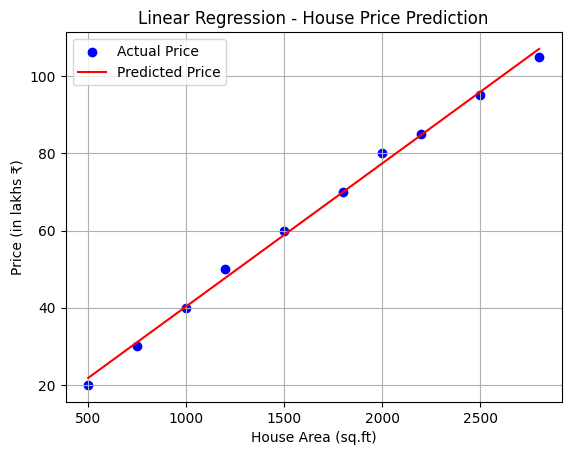

Mean Squared Error (MSE): 2.2732019938286223
R² Score: 0.9968656297913429


In [28]:
data = {
    'Area': [500, 750, 1000, 1200, 1500, 1800, 2000, 2200, 2500, 2800],
    'Price': [20, 30, 40, 50, 60, 70, 80, 85, 95, 105]  # in lakhs
}

df=pd.DataFrame(data)
X = df[['Area']]   # feature(input)
y = df['Price']  #target(output)
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print("Model Coefficient (w):", model.coef_[0])
print("Model Intercept (b):", model.intercept_)
model.predict([[2700]])
d={'Area':[100,200,400,500,600]}
df2=pd.DataFrame(d)
df2
df2.head(2)
p=model.predict(df2)
df2['price']=p

df2
plt.scatter(X, y, color='blue', label='Actual Price')
plt.plot(X, y_pred, color='red', label='Predicted Price')
plt.xlabel("House Area (sq.ft)")
plt.ylabel("Price (in lakhs ₹)")
plt.title("Linear Regression - House Price Prediction")
plt.legend()
plt.grid(True)
plt.show()

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

### multivariable linear regression problem 
     * saving the model into the file so that we dont have to train our model every time it can be done by pickle and joblib 

In [6]:
import pandas as pd
import pickle,joblib
from sklearn.linear_model import LinearRegression


data = {
    'Bedrooms': [1, 2, 3, 3, 4, 4, 5, 5, 6, 7],
    'Size':     [600, 800, 1000, 1200, 1500, 1600, 1800, 2000, 2300, 2500],  # in sq.ft
    'Age':      [10, 8, 6, 5, 3, 2, 4, 3, 2, 1],  # years old
    'Price':    [20, 30, 45, 50, 65, 70, 80, 85, 100, 110]  # in lakhs
}

df = pd.DataFrame(data)
X = df[['Bedrooms', 'Size', 'Age']]  # Multiple features
y = df['Price']
model = LinearRegression()
model.fit(X, y)
print("Coefficients (w):", model.coef_)
print("Intercept (b):", model.intercept_)
new_data = [[3, 1400, 4]]
predicted_price = model.predict(new_data)
print(predicted_price)

with open('house_price_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('house_price_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Predict using loaded model
prediction = loaded_model.predict([[5, 4000, 2]])
print("Predicted Price for 5 BHK, 4000 sqft, 2 years old:", prediction[0])



# using joblib
joblib.dump(model, 'house_price_model_joblib.pkl')
loaded_model = joblib.load('house_price_model_joblib.pkl')
prediction = loaded_model.predict([[5, 4000, 2]])
print("Predicted Price for 5 BHK, 4000 sqft, 2 years old:", prediction[0])

model.score(X,y)

Coefficients (w): [ 5.06579155  0.0287416  -0.74390205]
Intercept (b): 4.535357041432434
[56.99536146]
Predicted Price for 5 BHK, 4000 sqft, 2 years old: 143.34290492568698
Predicted Price for 5 BHK, 4000 sqft, 2 years old: 143.34290492568698


c:\Users\svish\OneDrive\Desktop\jupyter-notebook\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\svish\OneDrive\Desktop\jupyter-notebook\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\svish\OneDrive\Desktop\jupyter-notebook\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.9988685371617592

### Gradient descent and Cost function (MSE)

In [29]:
import numpy as np

X = np.array([1, 2, 3, 4, 5])
y = np.array([3, 6, 9, 12, 15])  # y = 3x (ideal line)

w = 0.0
b = 0.0

alpha = 0.01
epochs = 1000
n = len(X)

# Gradient Descent Loop
for i in range(epochs):
    y_pred = w * X + b
    error = y_pred - y
    mse = np.mean(error**2)

    # Derivatives (gradients)
    dw = (2/n) * np.dot(X, error)
    db = (2/n) * np.sum(error)

    # Update weights
    w -= alpha * dw
    b -= alpha * db

    if i % 100 == 0:
        print(f"Epoch {i}: w = {w:.4f}, b = {b:.4f}, MSE = {mse:.4f}")

# Final model
print(f"\nFinal Equation: y = {w:.2f}x + {b:.2f}")


Epoch 0: w = 0.6600, b = 0.1800, MSE = 99.0000
Epoch 100: w = 2.8482, b = 0.5482, MSE = 0.0551
Epoch 200: w = 2.8918, b = 0.3907, MSE = 0.0280
Epoch 300: w = 2.9229, b = 0.2785, MSE = 0.0142
Epoch 400: w = 2.9450, b = 0.1985, MSE = 0.0072
Epoch 500: w = 2.9608, b = 0.1414, MSE = 0.0037
Epoch 600: w = 2.9721, b = 0.1008, MSE = 0.0019
Epoch 700: w = 2.9801, b = 0.0719, MSE = 0.0009
Epoch 800: w = 2.9858, b = 0.0512, MSE = 0.0005
Epoch 900: w = 2.9899, b = 0.0365, MSE = 0.0002

Final Equation: y = 2.99x + 0.03


## Regularization 
### L1(lasso) and L2(ridge) 


In [30]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# Sample Data (House: area, bedrooms, age, distance, school_rating)
data = {
    'area': [1000, 1500, 1800, 2000, 2300, 2500, 2800, 3000],
    'bedrooms': [2, 3, 3, 4, 3, 4, 4, 5],
    'age': [5, 10, 8, 15, 20, 18, 25, 30],
    'distance': [1, 2, 2.5, 3, 4, 5, 6, 7],
    'school_rating': [9, 8, 7, 7, 6, 6, 5, 4],
    'price': [50, 65, 70, 80, 85, 90, 95, 100]
}

df = pd.DataFrame(data)

X = df.drop('price', axis=1)  # Features
y = df['price']               # Target

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=1.0)  # L2 regularization
ridge.fit(X_train, y_train)
ridge_preds = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_preds)
print("Ridge MSE:", ridge_mse)
print("Ridge Coefficients:", ridge.coef_)


lasso = Lasso(alpha=1.0)  # L1 regularization
lasso.fit(X_train, y_train)
lasso_preds = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_preds)
print("\nLasso MSE:", lasso_mse)
print("Lasso Coefficients:", lasso.coef_)


Ridge MSE: 1.7179772554610346
Ridge Coefficients: [ 0.02865535  0.82646687  0.24429029 -1.94731852  0.87925826]

Lasso MSE: 1.513975106668727
Lasso Coefficients: [ 0.02485541  0.          0.         -0.          0.        ]


### Elastic net regression

In [31]:
from sklearn.linear_model import  ElasticNet
elastic = ElasticNet(alpha=1.0, l1_ratio=0.5)  # l1_ratio=0.5 means equal mix of L1 and L2
elastic.fit(X_train, y_train)
elastic_preds = elastic.predict(X_test)
elastic_mse = mean_squared_error(y_test, elastic_preds)
print("\nElasticNet MSE:", elastic_mse)
print("ElasticNet Coefficients:", elastic.coef_)


ElasticNet MSE: 1.51938956745966
ElasticNet Coefficients: [ 0.02502792  0.          0.         -0.05663824  0.        ]


### Encoding and its types 

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Sample data (like Titanic)
data = {
    'Gender': ['Male', 'Female', 'Female', 'Male'],
    'Class': ['First', 'Second', 'Third', 'First'],
    'Fare': [100, 50, 20, 80]
}

df = pd.DataFrame(data)

# Label Encoding for Gender
le = LabelEncoder()
df['Gender_Encoded'] = le.fit_transform(df['Gender'])

# One Hot Encoding for Class
df_encoded = pd.get_dummies(df, columns=['Class'])

print(df_encoded)


   Gender  Fare  Gender_Encoded  Class_First  Class_Second  Class_Third
0    Male   100               1         True         False        False
1  Female    50               0        False          True        False
2  Female    20               0        False         False         True
3    Male    80               1         True         False        False


### Train Test split method 

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

data = {
    'Hours_Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Score':         [35, 40, 50, 55, 60, 65, 70, 75, 85, 95]
}

df = pd.DataFrame(data)
X = df[['Hours_Studied']]
y = df['Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = LinearRegression()
model.fit(X_train, y_train)

predicted_scores = model.predict(X_test)

print("Actual Scores:", list(y_test))
print("Predicted Scores:", predicted_scores)
print("Model accuracy on test data:", model.score(X_test, y_test))


Actual Scores: [50, 95]
Predicted Scores: [47.09459459 89.18918919]
Model accuracy on test data: 0.9583141700258818


## Logistic regression

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load data
df = pd.read_csv("C:/Users/svish/OneDrive/Desktop/titanic-dataset/train.csv")

# Select relevant features
df = df[['Survived', 'Pclass', 'Sex', 'Age']]
df.dropna(inplace=True)

# Convert 'Sex' to numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Define features and target
X = df[['Pclass', 'Sex', 'Age']]
y = df['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediction and Evaluation
y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[68 19]
 [17 39]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79        87
           1       0.67      0.70      0.68        56

    accuracy                           0.75       143
   macro avg       0.74      0.74      0.74       143
weighted avg       0.75      0.75      0.75       143



### Decision tree algorithm 
It is the part of the supervised learning in machine learning algorithm .

Predictions: [1 0 0]


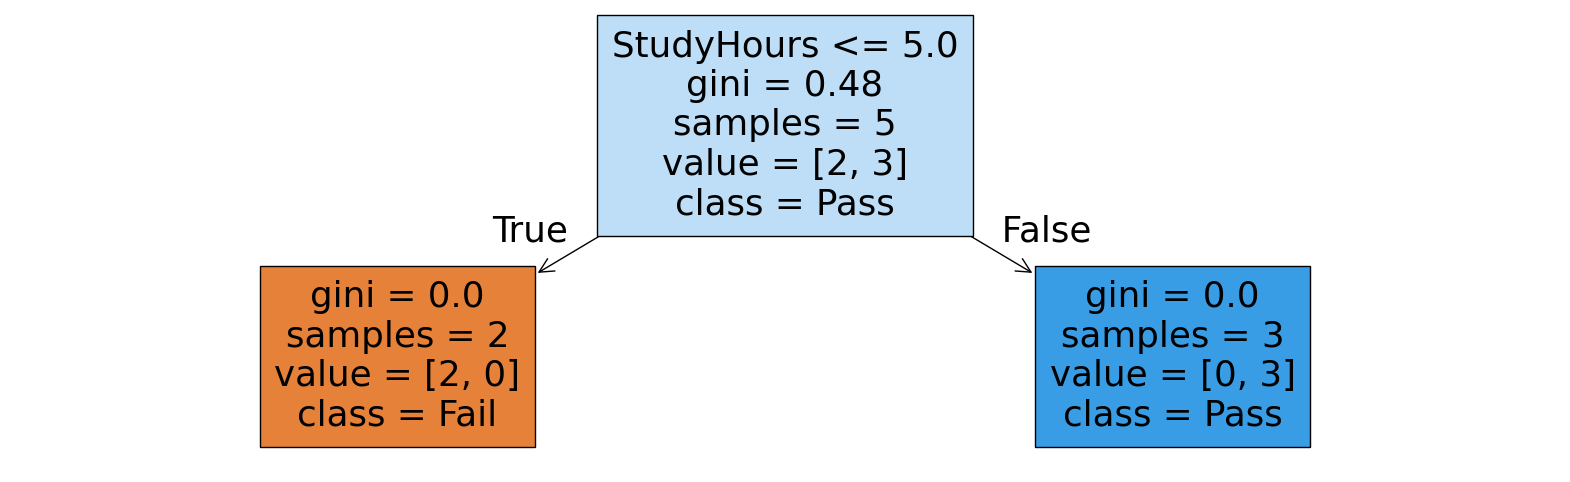

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

data = {
    'StudyHours': [2, 4, 3, 8, 10, 1, 6, 7],
    'Attendance': [60, 80, 70, 90, 95, 50, 85, 88],
    'Result': [0, 0, 0, 1, 1, 0, 1, 1]
}
df = pd.DataFrame(data)

X = df[['StudyHours', 'Attendance']]
y = df['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = DecisionTreeClassifier(criterion='gini', max_depth=3)
model.fit(X_train, y_train)

print("Predictions:", model.predict(X_test))

plt.figure(figsize=(20,6))
tree.plot_tree(model, feature_names=['StudyHours', 'Attendance'], class_names=['Fail', 'Pass'], filled=True)
plt.show()


### Random forest algorithm 
it is the advanced version of decision tree and part of ensemble learning modeles bagging type .

In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Sample Data
data = {
    'Age': [22, 25, 47, 52, 46, 56, 55, 60],
    'Salary': [25000, 32000, 50000, 52000, 48000, 60000, 58000, 62000],
    'BoughtBefore': [0, 0, 1, 1, 1, 1, 0, 1],
    'BuyProduct': [0, 0, 1, 1, 1, 1, 0, 1]
}
df = pd.DataFrame(data)

# Features and Target
X = df[['Age', 'Salary', 'BoughtBefore']]
y = df['BuyProduct']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Model
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6666666666666666
Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



### Random forest regressor 

R2 Score: 0.9332756865912762
MSE: 917830000.0


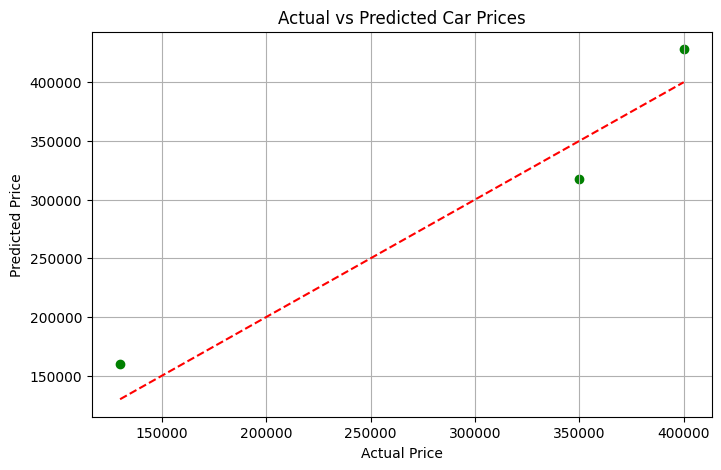

In [17]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

data = {
    'Age': [1, 3, 5, 2, 7, 4, 6, 8, 10, 9],
    'KM_Driven': [15000, 40000, 60000, 25000, 80000, 50000, 65000, 90000, 100000, 95000],
    'Horsepower': [120, 110, 100, 130, 90, 105, 95, 85, 80, 88],
    'Selling_Price': [500000, 400000, 300000, 480000, 200000, 350000, 270000, 150000, 130000, 160000]
}

df = pd.DataFrame(data)

X = df[['Age', 'KM_Driven', 'Horsepower']]
y = df['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestRegressor(n_estimators=100, max_depth=4, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.grid()
plt.show()


### SVM(support vector machine )

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



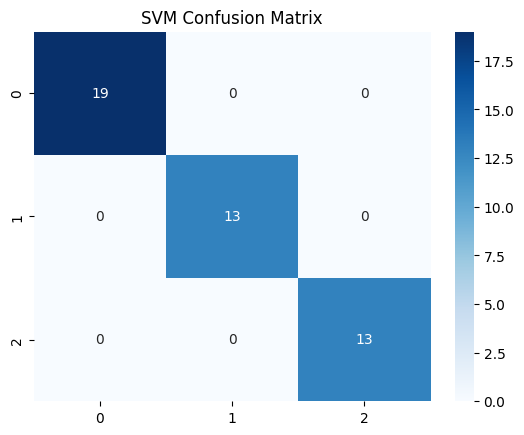

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}
Best Score: 0.9714285714285715


In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = SVC(kernel='rbf', C=1, gamma='scale')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt='g')
plt.title("SVM Confusion Matrix")
plt.show()

# svm hyperparameter tuning (impotant for accuracy)
from sklearn.model_selection import GridSearchCV

params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(SVC(), params, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


### K fold cross validation for evaluating model perfomance 

In [ ]:
# kfold for classfication problem 
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("C:/Users/svish/OneDrive/Desktop/titanic-dataset/train.csv")
df = df[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']].dropna()
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

X = df[['Pclass', 'Sex', 'Age', 'Fare']]
y = df['Survived']

kf = KFold(n_splits=5, shuffle=True, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(max_depth=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    print(f"{name} - Accuracy in each fold: {scores}")
    print(f"{name} - Average Accuracy: {scores.mean():.4f}\n")


Logistic Regression - Accuracy in each fold: [0.75524476 0.77622378 0.7972028  0.86713287 0.78169014]
Logistic Regression - Average Accuracy: 0.7955

Decision Tree - Accuracy in each fold: [0.72027972 0.76923077 0.81818182 0.86713287 0.81690141]
Decision Tree - Average Accuracy: 0.7983

Random Forest - Accuracy in each fold: [0.78321678 0.7972028  0.82517483 0.9020979  0.81690141]
Random Forest - Average Accuracy: 0.8249



In [4]:
# kfold cross validation for regression problem 
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

data = {
    'Bedrooms': [2, 3, 4, 3, 5, 6, 4, 3],
    'Size': [1000, 1500, 2000, 1800, 2500, 2800, 2200, 1600],
    'Price': [50, 70, 100, 85, 130, 150, 120, 75]
}
df = pd.DataFrame(data)

X = df[['Bedrooms', 'Size']]
y = df['Price']

kf = KFold(n_splits=5, shuffle=True, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(max_depth=4),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=4, random_state=42)
}

for name, model in models.items():
    neg_mse = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-neg_mse)
    print(f"{name} - RMSE in each fold: {rmse_scores}")
    print(f"{name} - Average RMSE: {rmse_scores.mean():.4f}\n")




Linear Regression - RMSE in each fold: [ 3.20933977  9.21444981  2.33746309  7.71653543 12.09302326]
Linear Regression - Average RMSE: 6.9142

Decision Tree - RMSE in each fold: [14.57737974 14.57737974 15.8113883  10.         20.        ]
Decision Tree - Average RMSE: 14.9932

Random Forest - RMSE in each fold: [18.89540288 18.28858934  5.24046754  7.3        19.25      ]
Random Forest - Average RMSE: 13.7949



### Hyper parameter tuning in machine leraning 

In [5]:
# gridsearch cv
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv("C:/Users/svish/OneDrive/Desktop/titanic-dataset/train.csv")
df = df[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']].dropna()
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
X = df[['Pclass', 'Sex', 'Age', 'Fare']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy Score:", grid.best_score_)


Best Parameters: {'max_depth': 7, 'min_samples_split': 5, 'n_estimators': 100}
Best Accuracy Score: 0.8441495041952708


In [6]:
# randomsearch cv 
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

data = {
    'Bedrooms': [2, 3, 4, 3, 5, 6, 4, 3],
    'Size': [1000, 1500, 2000, 1800, 2500, 2800, 2200, 1600],
    'Price': [50, 70, 100, 85, 130, 150, 120, 75]
}
df = pd.DataFrame(data)
X = df[['Bedrooms', 'Size']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10]
}
random_search = RandomizedSearchCV(model, param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best RMSE Score:", np.sqrt(-random_search.best_score_))


Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 4}
Best RMSE Score: 18.449092118584048
